<a href="https://colab.research.google.com/github/stevenkhwun/P4DS/blob/main/Chp51_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning: Classification, Regression and Clustering

In [3]:
import matplotlib as plt
from sklearn.datasets import load_digits

In [4]:
digits = load_digits()

In [5]:
digits.target[::100]

array([0, 4, 1, 7, 4, 8, 2, 2, 4, 4, 1, 9, 7, 3, 2, 1, 2, 5])

In [6]:
import matplotlib.pyplot as plt

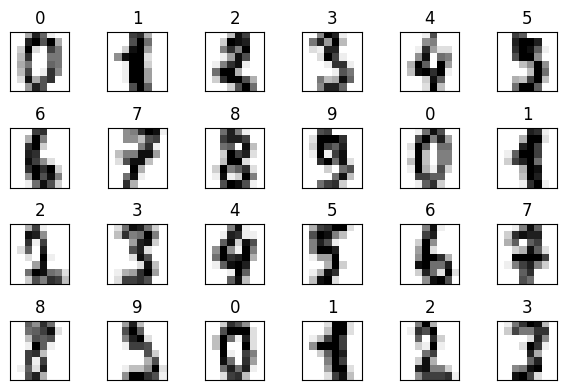

In [7]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))

for item in zip(axes.ravel(), digits.images, digits.target):
  axes, image, target = item
  axes.imshow(image, cmap=plt.cm.gray_r)
  axes.set_xticks([])     # remove x-axis tick marks
  axes.set_yticks([])     # remove y-axis tick marks
  axes.set_title(target)
plt.tight_layout()

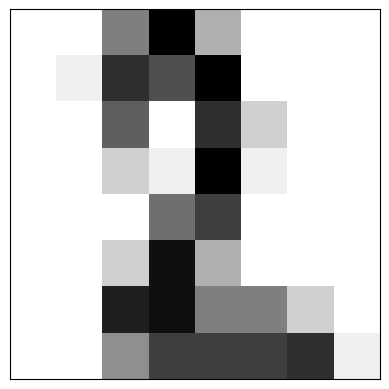

In [8]:
axes = plt.subplot()
image = plt.imshow(digits.images[22], cmap=plt.cm.gray_r)
xticks = axes.set_xticks([])
yticks = axes.set_yticks([])

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=11)

In [11]:
X_train.shape

(1347, 64)

In [12]:
X_test.shape

(450, 64)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier()

In [15]:
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

In [16]:
predicted = knn.predict(X=X_test)

In [17]:
expected = y_test

In [18]:
predicted[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 5, 6])

In [19]:
expected[0:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6])

In [20]:
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p!= e]
wrong

[(5, 3),
 (8, 9),
 (4, 9),
 (7, 3),
 (7, 4),
 (2, 8),
 (9, 8),
 (3, 8),
 (3, 8),
 (1, 8)]

In [21]:
print(f'{knn.score(X_test, y_test):.2%}')

97.78%


In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
confusion = confusion_matrix(y_true=expected, y_pred=predicted)
confusion

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 54,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 49,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  1,  1,  2,  0,  0,  0,  0, 39,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 41]])

In [24]:
from sklearn.metrics import classification_report

In [25]:
names = [str(digit) for digit in digits.target_names]

In [26]:
print(classification_report(expected, predicted, target_names=names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      1.00      0.99        45
           2       0.98      1.00      0.99        54
           3       0.95      0.95      0.95        44
           4       0.98      0.98      0.98        50
           5       0.97      1.00      0.99        38
           6       1.00      1.00      1.00        42
           7       0.96      1.00      0.98        45
           8       0.97      0.89      0.93        44
           9       0.98      0.95      0.96        43

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



* **precision** is the total number of correct predictions for a given digit divided by the total number of predictions for that digit.
* **recall** is the total number of correct predictions for a given digit divided by the total number of samples that should have been predicted as that digit.
* **f1-score** is the average of the *precision* and the *recall*.
* **support** is the number of samples with a given expected value. For example, 50 samples were labeled as 4s, and 38 samples were labeled as 5s.

Check [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) for the details of the parameters for the function `classification_report`.

In [29]:
import pandas as pd

In [31]:
confusion_df = pd.DataFrame(confusion, index=range(10), columns=range(10))

In [32]:
import seaborn as sns

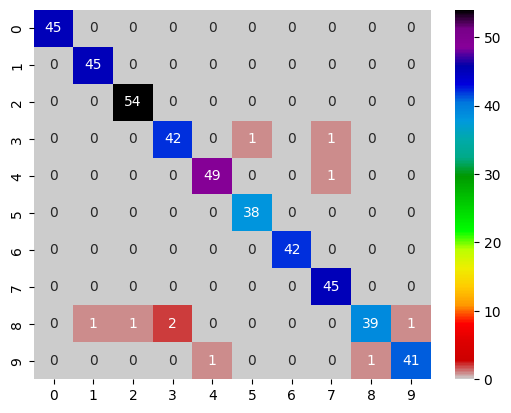

In [33]:
axes = sns.heatmap(confusion_df, annot=True, cmap='nipy_spectral_r')